In [1]:
import numpy as np
import pandas as pd
from scipy import signal, fft
import matplotlib.pyplot as plt

In [2]:
x = signal.gaussian(51, std=7)
g = np.ones(100)
g[:10] = 0
g[90:] = 0

In [3]:
y = signal.convolve(g, x)
n = np.random.randn(y.size)*1e-5
yn = y + n

In [4]:
q, r = signal.deconvolve(y, x)
qn, rn = signal.deconvolve(yn, x)

In [5]:
y.shape

(150,)

(-1.0, 20.0)

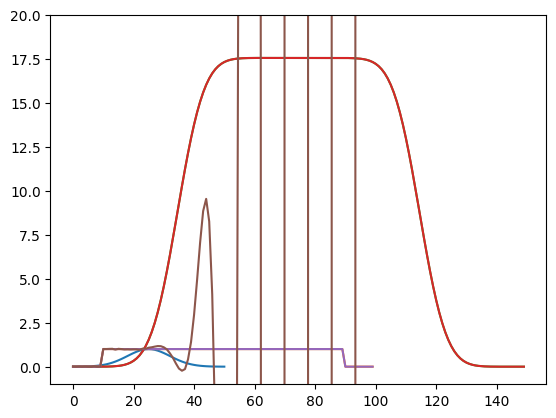

In [6]:
fig, axe = plt.subplots()
axe.plot(x)
axe.plot(g)
axe.plot(y)
axe.plot(yn)
axe.plot(q)
axe.plot(qn)
axe.set_ylim([-1, 20])

In [7]:
fs = 1
N = 2**12

In [8]:
fx, Px = signal.welch(x, fs=fs, nfft=N, return_onesided=False)
fy, Py = signal.welch(y, fs=fs, nfft=N, return_onesided=False)
fn, Pn = signal.welch(n, fs=fs, nfft=N, return_onesided=False)

/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 51, using nperseg = 51
  warnings.warn('nperseg = {0:d} is greater than input length '
/usr/local/lib/python3.10/dist-packages/scipy/signal/_spectral_py.py:1999: UserWarning: nperseg = 256 is greater than input length  = 150, using nperseg = 150
  warnings.warn('nperseg = {0:d} is greater than input length '


In [9]:
fx_, Px_ = signal.welch(x, fs=fs, nfft=N, return_onesided=True)
fy_, Py_ = signal.welch(y, fs=fs, nfft=N, return_onesided=True)
fn_, Pn_ = signal.welch(n, fs=fs, nfft=N, return_onesided=True)

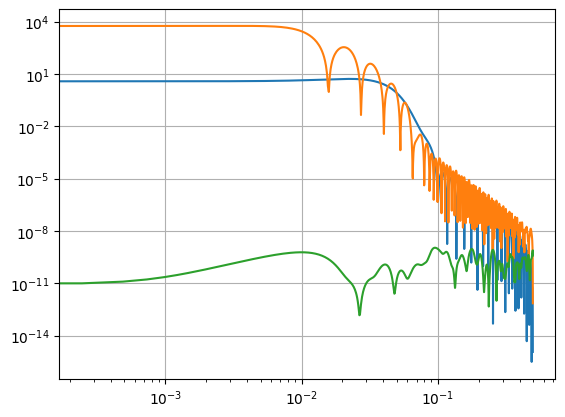

In [10]:
fig, axe = plt.subplots()
axe.loglog(fx_, Px_)
axe.loglog(fy_, Py_)
axe.loglog(fn_, Pn_)
axe.grid()

In [11]:
X = fft.fft(x, n=N)
Y = fft.fft(y, n=N)

In [12]:
Pn

array([4.54500050e-12, 4.96377966e-12, 6.21793071e-12, ...,
       8.30090127e-12, 6.21793071e-12, 4.96377966e-12])

In [13]:
G = (Y*Px)/((Y*Y.conj())*Px + Pn + 1)

In [14]:
g = np.real(fft.ifft(G))

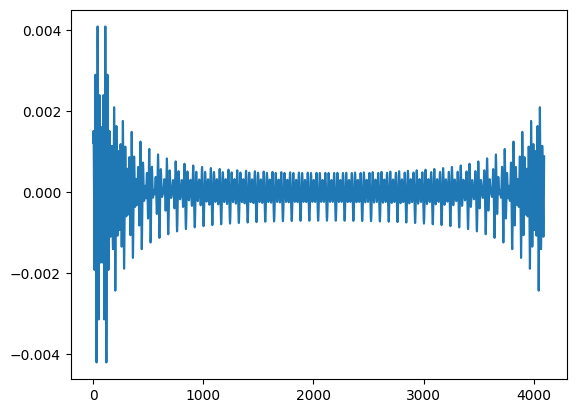

In [15]:
fig, axe = plt.subplots()
axe.plot(g)